In [1]:
# import all the libraries and packages 
!pip install researchpy
!pip install bioinfokit

import researchpy as rp
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

from bioinfokit.analys import stat

# import the data 
data = pd.read_csv('Arrests_and_Strip_Searches.csv')
data.head()



,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

# EDA Part I
## Preprocessing

## 1. Clean Duplicate values and null values

In [3]:
# number of duplicated Person ID. 
num_id_duplicate = data.duplicated(subset = ['PersonID']).sum()
print(f'we found out that the number of duplicated Person ID is:'+ str(num_id_duplicate))
# duplicate_person = pd.DataFrame(data['PersonID'].value_counts().reset_index(name='counts').query('counts > 1'))

print('we decided to drop all rows with the duplicated ID because racial information are not consistent even for the same ID.\nExample as below: ')
print('\nSame PersonID(310375) with three different perceived races')
data[data['PersonID'] == 310375].head(10)


we found out that the number of duplicated Person ID is:27929
we decided to drop all rows with the duplicated ID because racial information are not consistent even for the same ID.
Example as below: 

Same PersonID(310375) with three different perceived races


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
4055,2021,Apr-June,1026292,6004761.0,310375,Indigenous,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4056
4110,2021,Apr-June,1057652,6002959.0,310375,Indigenous,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4111
4112,2021,Apr-June,1005963,6019797.0,310375,Indigenous,M,Aged 25 to 34 years,Not a youth,14,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,4113
4113,2021,Apr-June,1049739,6056274.0,310375,Indigenous,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4114
4115,2021,July-Sept,1009656,6040578.0,310375,Unknown or Legacy,M,Aged 25 to 34 years,Not a youth,32,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4116
4118,2021,July-Sept,1059534,6023099.0,310375,Indigenous,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,4119
4121,2021,July-Sept,1047267,6018060.0,310375,Indigenous,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4122
4124,2021,July-Sept,1030302,6006772.0,310375,White,M,Aged 25 to 34 years,Not a youth,13,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,4125
4127,2021,Oct-Dec,1007596,6045881.0,310375,Indigenous,M,Aged 35 to 44 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,4128
4130,2021,Oct-Dec,1036841,6019591.0,310375,Indigenous,M,Aged 35 to 44 years,Not a youth,XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,4131


In [4]:
#Drop the duplicate 
data = data.drop_duplicates(subset='PersonID', keep=False)

# all null values in the data
print(data.isnull().sum())

# convert all the null values in search reasons to 0 
data['SearchReason_CauseInjury']=data['SearchReason_CauseInjury'].fillna(0)
data['SearchReason_AssistEscape']=data['SearchReason_AssistEscape'].fillna(0)
data['SearchReason_PossessWeapons']=data['SearchReason_PossessWeapons'].fillna(0)
data['SearchReason_PossessEvidence']=data['SearchReason_PossessEvidence'].fillna(0)

# convert all null valuesi n items found to 0 
data['ItemsFound']=data['ItemsFound'].fillna(0)

# remove all the rows wiht null values in age and racial data, arrestID  data
data = data.dropna( subset = ['Age_group__at_arrest_','Perceived_Race','ArrestID','Occurrence_Category'])
data['Actions_at_arrest___Cooperative'].value_counts()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                              18
PersonID                               0
Perceived_Race                         2
Sex                                    0
Age_group__at_arrest_                 19
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                   73
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           25121
SearchReason_AssistEscape          25121
SearchReason_PossessWeapons        25121
SearchReason_PossessEvidence       25121
ItemsFound                         25121
ObjectId        

0    13881
1    12780
Name: Actions_at_arrest___Cooperative, dtype: int64

# 2. Modify some variables

In [5]:
##  2.1 Perceived_Race |Delete the "unknown or legacy" group
data = data[data.Perceived_Race != 'Unknown or Legacy']
##  2.2 Age_group__at_arrest_ | clean the under 17 years and over 65 years old groups
data = data.replace('Youth (aged 17 years and under)', 'Youth (aged 17 and younger)')
data = data.replace('Aged 17 years and under', 'Aged 17 years and younger')
data = data.replace('Aged 65 and older', 'Aged 65 years and older')
## 2.3 delete the sex type U
data = data[data.Sex != 'U']
## 2.4  Exchange values of 0 and 1  in the cooperative actions 
data['Actions_at_arrest___Cooperative'] = data['Actions_at_arrest___Cooperative'].replace({0:1,1:0})

# 3. Creat 2 new continuous variables(number of the actions at rest & number of search reasons)



In [6]:
# create the number actions at rest 
data['Number_actions_at_arrest'] = data.loc[:,['Actions_at_arrest___Concealed_i', 'Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d',
                                             'Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative']].sum(axis=1)
# Create the number of search reasons
data['Number_search_reason'] = data.loc[:,['SearchReason_CauseInjury', 'SearchReason_AssistEscape',
                                             'SearchReason_PossessWeapons','SearchReason_PossessEvidence']].sum(axis=1)
# change the 2 continuos variables into integer 
data[['Number_search_reason','Number_actions_at_arrest']] = data[['Number_search_reason',
                                                                'Number_actions_at_arrest']].astype('int64')

## 4. Change Data types

In [7]:
# Based on the given dataset information on the website: 
# Change some variables into categorical variables 
data[['Arrest_Year','Arrest_Month','Perceived_Race','Sex','Age_group__at_arrest_',
      'Youth_at_arrest__under_18_years','ArrestLocDiv','StripSearch','Booked','Occurrence_Category',
      'Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d',
      'Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative',
      'SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons',
      'SearchReason_PossessEvidence','ItemsFound'
     ]] = data[['Arrest_Year','Arrest_Month','Perceived_Race','Sex','Age_group__at_arrest_',
      'Youth_at_arrest__under_18_years','ArrestLocDiv','StripSearch','Booked','Occurrence_Category',
      'Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d',
      'Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative',
      'SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons',
      'SearchReason_PossessEvidence','ItemsFound']].astype('category')
# change some data type to integers 
data[['EventID','PersonID','ArrestID',
    'ObjectId']] = data[['EventID','PersonID','ArrestID','ObjectId']].astype('int64')

# 5. Delete some unwanted columns

In [8]:
# Select the ones you want
data = data[['PersonID','Perceived_Race','Sex','Age_group__at_arrest_','StripSearch',
       'Number_actions_at_arrest', 'Number_search_reason']]

In [9]:
print('Table 1. A subset of our final dataset ')
data.head()


Table 1. A subset of our final dataset 


,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,StripSearch,Number_actions_at_arrest,Number_search_reason
13,328630,Indigenous,M,Aged 45 to 54 years,0,1,0
22,324224,Black,M,Aged 45 to 54 years,0,0,0
23,302537,White,M,Aged 25 to 34 years,0,1,0
24,305813,Black,M,Aged 25 to 34 years,0,1,0
25,323720,White,M,Aged 35 to 44 years,0,1,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24022 entries, 13 to 65275
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   PersonID                  24022 non-null  int64   
 1   Perceived_Race            24022 non-null  category
 2   Sex                       24022 non-null  category
 3   Age_group__at_arrest_     24022 non-null  category
 4   StripSearch               24022 non-null  category
 5   Number_actions_at_arrest  24022 non-null  int64   
 6   Number_search_reason      24022 non-null  int64   
dtypes: category(4), int64(3)
memory usage: 845.5 KB


# EDA Part II

## Univariate and Multivariate EDA

## Race

Tablexx . The frequency table for the racial group distribution


                      count       pct
White                  9944  0.413954
Black                  6800  0.283074
East/Southeast Asian   2520  0.104904
South Asian            1964  0.081758
Middle-Eastern         1598  0.066522
Latino                  853  0.035509
Indigenous              343  0.014279


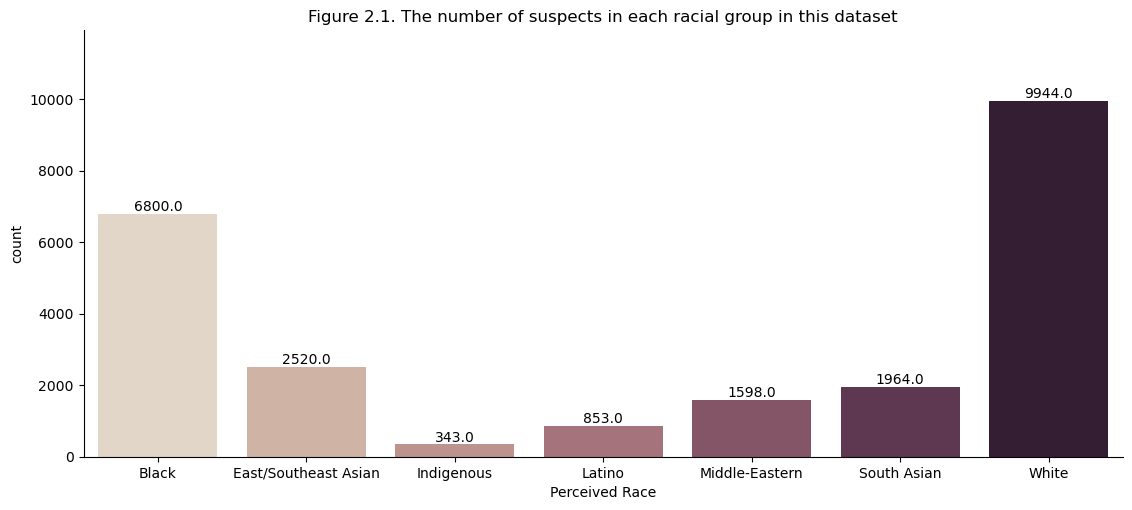

In [11]:
table1 = data.Perceived_Race.value_counts().to_frame('count')
table1['pct'] = table1['count'] / table1['count'].sum()
print("Tablexx . The frequency table for the racial group distribution")
print('\n')
print(table1)

figure = sns.catplot(x="Perceived_Race", kind="count", palette="ch:.25", data=data,height=5, aspect=16/7)

# add annotations
for ax in figure.axes.ravel():
    for c in ax.containers:
        labels = [f'{v.get_height()}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
ax.set(title = 'Figure 2.1. The number of suspects in each racial group in this dataset')
ax.set_xlabel('Perceived Race')

plt.show()

# EDA Part II

## Age(Age_group__at_arrest_)


Table 2. The frequency table for the Age group at arrest distribution


                           count       pct
Aged 25 to 34 years         7075  0.294522
Aged 35 to 44 years         5070  0.211057
Aged 18 to 24 years         4280  0.178170
Aged 45 to 54 years         3358  0.139789
Aged 55 to 64 years         2038  0.084839
Aged 17 years and younger   1385  0.057655
Aged 65 years and older      816  0.033969


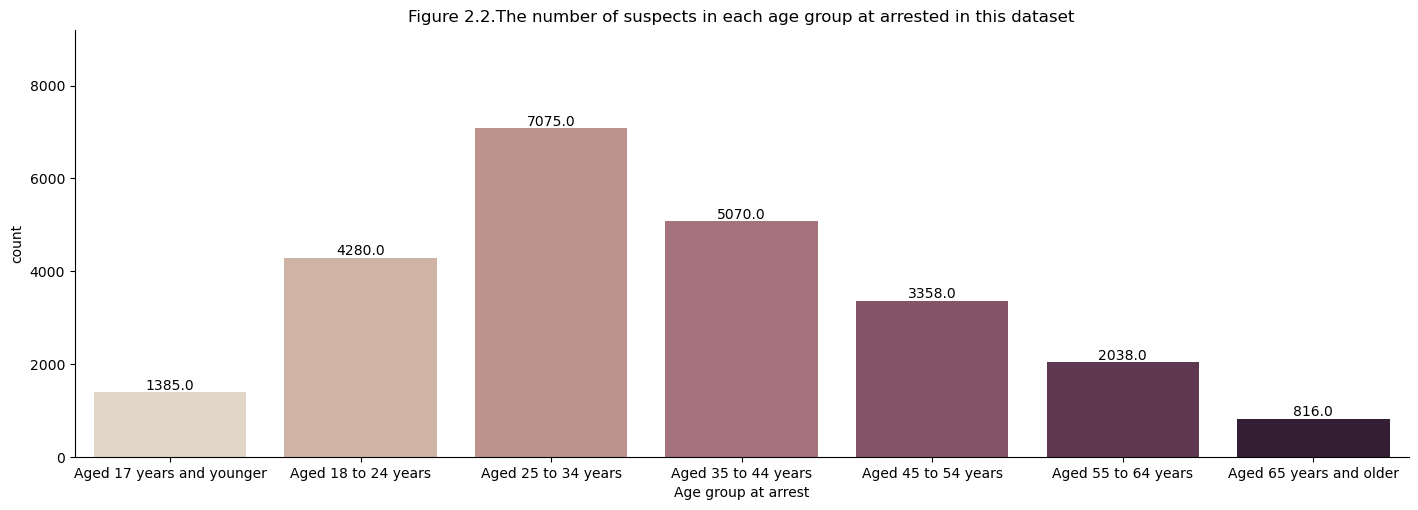

In [12]:

table2 = data.Age_group__at_arrest_.value_counts().to_frame('count')
table2['pct'] = table2['count'] / table2['count'].sum()
print("Table 2. The frequency table for the Age group at arrest distribution")
print('\n')
print(table2)


figure = sns.catplot(x="Age_group__at_arrest_", kind="count", palette="ch:.25", data=data,height=5, aspect=20/7)

# add annotations

for ax in figure.axes.ravel():
    for c in ax.containers:
        labels = [f'{v.get_height()}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.3)

ax.set(title = 'Figure 2.2.The number of suspects in each age group at arrested in this dataset')
ax.set_xlabel('Age group at arrest')

plt.show()

## SEX

In [59]:
table3 = data.Sex.value_counts().to_frame('count')
table3['pct'] = table3['count'] / table3['count'].sum()
print("Table 2.1. The number of female \nand male suspects in this dataset")

print(table3)

Table 2.1. The number of female 
and male suspects in this dataset
   count       pct
M  18733  0.779827
F   5289  0.220173


## Number of action at arrest

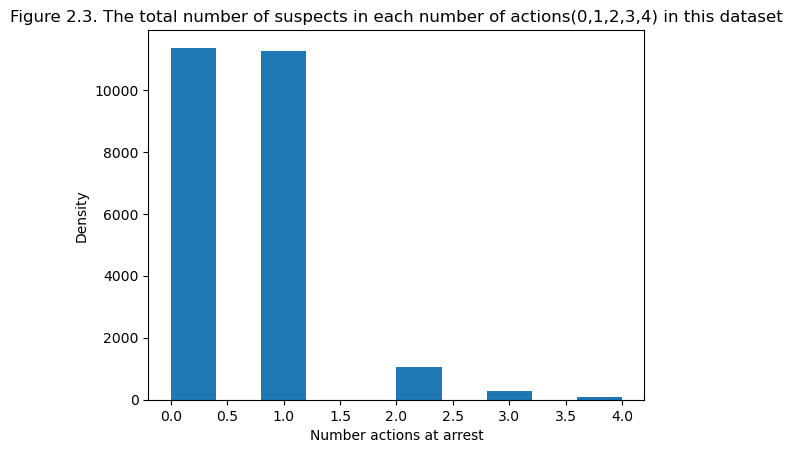

In [14]:
plt.xlabel('Number actions at arrest')
plt.ylabel('Density')
plt.hist(data['Number_actions_at_arrest'],fill = True)
plt.title("Figure 2.3. The total number of suspects in each number of actions(0,1,2,3,4) in this dataset")
plt.show()

## Number of Search reasons 

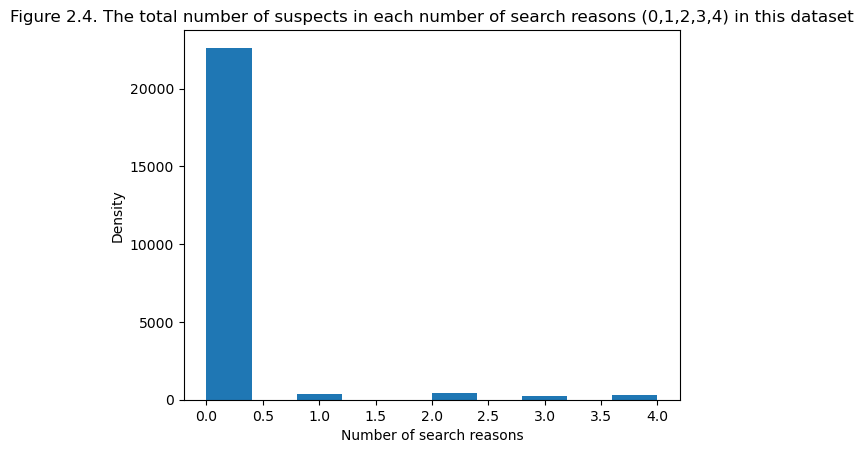

In [15]:
plt.xlabel('Number of search reasons')
plt.ylabel('Density')
plt.hist(data['Number_search_reason'],fill = True)
plt.title("Figure 2.4. The total number of suspects in each number of search reasons (0,1,2,3,4) in this dataset")
plt.show()

## Strip Search


In [16]:
table3 = data.StripSearch.value_counts().to_frame('count')
table3['pct'] = table3['count'] / table3['count'].sum()
print("Table. Percetage for stripped v.s. non-stripped ")
print('\n')
print(table3)
conti_table__action = pd.crosstab(index=data['Perceived_Race'], columns=data['StripSearch'], margins=True)
conti_table__action['stripped_percentage'] = conti_table__action[1] / (conti_table__action[1] + conti_table__action[0])
print('\n')
print("Table. Percetage for stripped v.s. non-stripped among racial group ")

conti_table__action

Table. Percetage for stripped v.s. non-stripped 


   count       pct
0  22521  0.937516
1   1501  0.062484


Table. Percetage for stripped v.s. non-stripped among racial group 


StripSearch,0,1,All,stripped_percentage
Perceived_Race,,,,
Black,6207,593,6800,0.087206
East/Southeast Asian,2431,89,2520,0.035317
Indigenous,316,27,343,0.078717
Latino,820,33,853,0.038687
Middle-Eastern,1538,60,1598,0.037547
South Asian,1886,78,1964,0.039715
White,9323,621,9944,0.062450
All,22521,1501,24022,0.062484


## Number of action ~ Racial group 

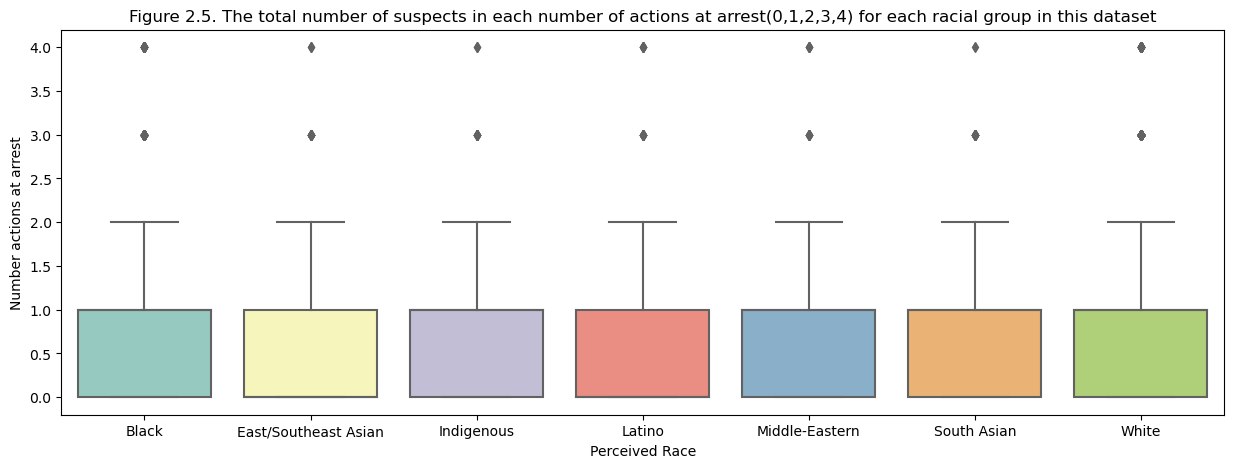



Table 2.2. The summary statistics of number of actions at arrest(0,1,2,3,4) for each racial group in the dataset


                       count      mean       std  min  25%  50%  75%  max
Perceived_Race                                                           
Black                 6800.0  0.630000  0.678183  0.0  0.0  1.0  1.0  4.0
East/Southeast Asian  2520.0  0.525000  0.586478  0.0  0.0  0.0  1.0  4.0
Indigenous             343.0  0.784257  0.737538  0.0  0.0  1.0  1.0  4.0
Latino                 853.0  0.512309  0.672324  0.0  0.0  0.0  1.0  4.0
Middle-Eastern        1598.0  0.577597  0.618985  0.0  0.0  1.0  1.0  4.0
South Asian           1964.0  0.587576  0.597131  0.0  0.0  1.0  1.0  4.0
White                 9944.0  0.616452  0.680703  0.0  0.0  1.0  1.0  4.0


In [17]:
# https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/two-sample-t-test.html
plt.figure(figsize=(15,5))
ax= sns.boxplot(x="Perceived_Race", y="Number_actions_at_arrest", data=data, palette="Set3") 
plt.title("Figure 2.5. The total number of suspects in each number of actions at arrest(0,1,2,3,4) for each racial group in this dataset")
plt.xlabel('Perceived Race')
plt.ylabel('Number actions at arrest')
plt.show()

print('\n')
print('Table 2.2. The summary statistics of number of actions at arrest(0,1,2,3,4) for each racial group in the dataset')
print('\n')
print(data.groupby("Perceived_Race")['Number_actions_at_arrest'].describe())

### t-test 1 [Number of action ~ Racial group ]
 Welch's t-test 1 test the mean differences of number of action at rest for indigenous  and latino racial group
Null hypothesis (H0): u1 = u2, which translates to the mean of xx group is equal to the mean of xx 



Alternative hypothesis (HA): u1 ≠ u2, which translates to the mean of xx is not equal to the mean of xx



WELCH’S T-TEST ASSUMPTIONS
Like every test, this inferential statistic test has assumptions. The assumptions that the data must meet in order for the test results to be valid are:

The independent variable (IV) is categorical with at least two levels (groups)

The dependent variable (DV) is continuous which is measured on an interval or ratio scale

The distribution of the two groups should follow the normal distribution

If any of these assumptions are violated then another test should be used.

reference from: https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/

0.5423760507951619 0.4514897424303438


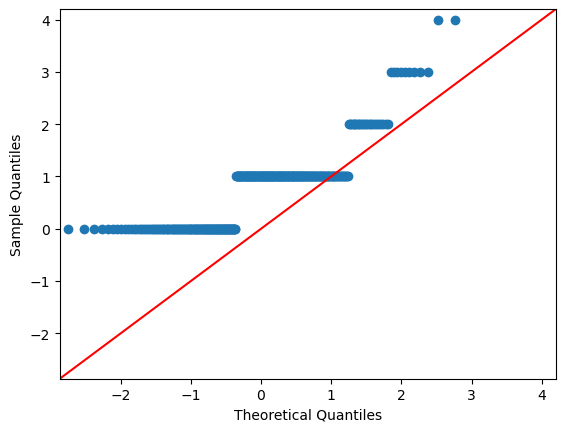

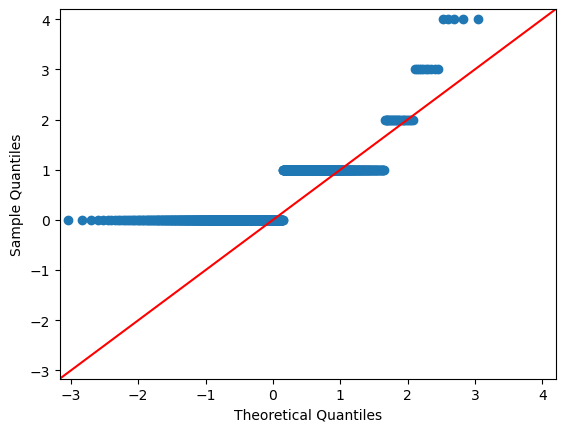

Table 2.6. The result of t-test for the mean of number of action at arrest between indigenous and latino racial groups
                  Satterthwaite t-test   results
0  Difference (Latino - Indigenous) =    -0.2719
1                Degrees of freedom =   582.6274
2                                 t =    -5.9122
3             Two side test p value =     0.0000
4            Difference < 0 p value =     0.0000
5            Difference > 0 p value =     1.0000
6                         Cohen's d =    -0.3932
7                         Hedge's g =    -0.3929
8                    Glass's delta1 =    -0.4045
9                  Point-Biserial r =    -0.2379


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Latino,853.0,0.512309,0.672324,0.023020,0.467127,0.557492
1,Indigenous,343.0,0.784257,0.737538,0.039823,0.705927,0.862586
2,combined,1196.0,0.590301,0.702207,0.020305,0.550464,0.630138


In [18]:
summary, results = rp.ttest(group1= data['Number_actions_at_arrest'][data['Perceived_Race'] == 'Latino'], group1_name= "Latino",
         group2= data['Number_actions_at_arrest'][data['Perceived_Race'] == 'Indigenous'], group2_name= "Indigenous",
                           equal_variances = False, paired = False)
print(np.var(data['Number_actions_at_arrest'][data['Perceived_Race'] == 'Indigenous']), 
      np.var(data['Number_actions_at_arrest'][data['Perceived_Race'] == 'Latino']))

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data['Number_actions_at_arrest'][data['Perceived_Race'] == 'Indigenous'], line='45')
plt.show()
fig = sm.qqplot(data['Number_actions_at_arrest'][data['Perceived_Race'] == 'Latino'], line='45')
plt.show()
print('Table 2.6. The result of t-test for the mean of number of action at arrest between indigenous and latino racial groups')

print(results)
summary

# Number of action ~ Age

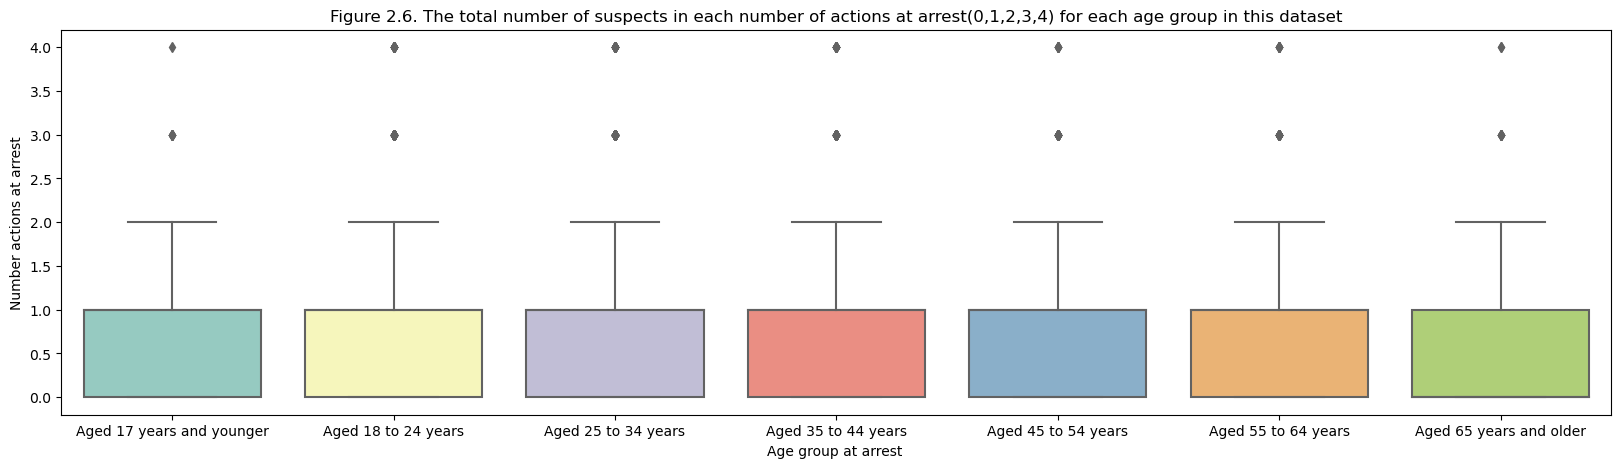



Table 2.3. The summary statistics of number of actions at arrest(0,1,2,3,4) for each age group in the dataset


                            count      mean       std  min  25%  50%  75%  max
Age_group__at_arrest_                                                         
Aged 17 years and younger  1385.0  0.561011  0.592032  0.0  0.0  1.0  1.0  4.0
Aged 18 to 24 years        4280.0  0.641822  0.674012  0.0  0.0  1.0  1.0  4.0
Aged 25 to 34 years        7075.0  0.621060  0.680212  0.0  0.0  1.0  1.0  4.0
Aged 35 to 44 years        5070.0  0.583432  0.657627  0.0  0.0  1.0  1.0  4.0
Aged 45 to 54 years        3358.0  0.582787  0.641733  0.0  0.0  1.0  1.0  4.0
Aged 55 to 64 years        2038.0  0.610402  0.670092  0.0  0.0  1.0  1.0  4.0
Aged 65 years and older     816.0  0.542892  0.623171  0.0  0.0  0.0  1.0  4.0


In [19]:
plt.figure(figsize=(20,5))
ax= sns.boxplot(x="Age_group__at_arrest_", y="Number_actions_at_arrest", data=data, palette="Set3") 
plt.title("Figure 2.6. The total number of suspects in each number of actions at arrest(0,1,2,3,4) for each age group in this dataset")
plt.xlabel('Age group at arrest ')
plt.ylabel('Number actions at arrest')
plt.show()

print('\n')
print('Table 2.3. The summary statistics of number of actions at arrest(0,1,2,3,4) for each age group in the dataset')
print('\n')
print(data.groupby("Age_group__at_arrest_")['Number_actions_at_arrest'].describe())

## Welch's t-test 2 [Number of action ~ Age​]
 test the mean differences of number of action at rest for age18-24, and age 17 and younger 

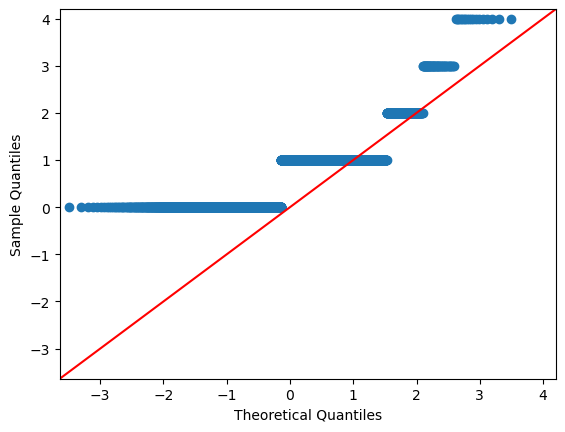

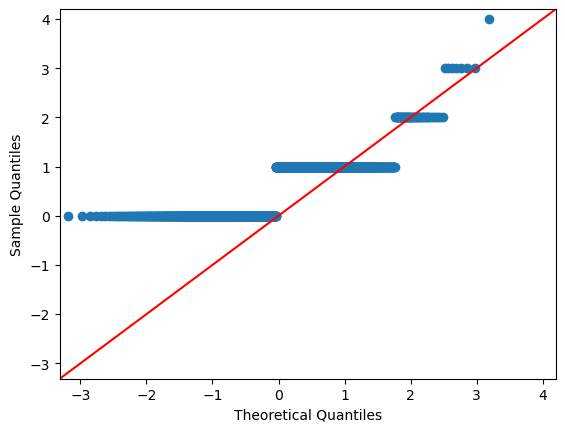

Table 2.7. The result of t-test for the mean of number of action at arrest between Aged 18 to 24 years and Aged 17 years and younger groups
                                Satterthwaite t-test    results
0  Difference (Aged 18 to 24 years - Aged 17 year...     0.0808
1                              Degrees of freedom =   2638.3094
2                                               t =      4.2638
3                           Two side test p value =      0.0000
4                          Difference < 0 p value =      1.0000
5                          Difference > 0 p value =      0.0000
6                                       Cohen's d =      0.1234
7                                       Hedge's g =      0.1234
8                                  Glass's delta1 =      0.1199
9                                Point-Biserial r =      0.0827


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Aged 18 to 24 years,4280.0,0.641822,0.674012,0.010303,0.621624,0.662021
1,Aged 17 years and younger,1385.0,0.561011,0.592032,0.015908,0.529804,0.592218
2,combined,5665.0,0.622065,0.655787,0.008713,0.604985,0.639146


In [20]:
summary, results = rp.ttest(group1= data['Number_actions_at_arrest'][data['Age_group__at_arrest_'] == 'Aged 18 to 24 years'], group1_name= "Aged 18 to 24 years",
         group2= data['Number_actions_at_arrest'][data['Age_group__at_arrest_'] == 'Aged 17 years and younger'], group2_name= "Aged 17 years and younger",
                           equal_variances = False, paired = False)



#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data['Number_actions_at_arrest'][data['Age_group__at_arrest_'] == 'Aged 18 to 24 years'], line='45')
plt.show()
fig = sm.qqplot(data['Number_actions_at_arrest'][data['Age_group__at_arrest_'] == 'Aged 17 years and younger'], line='45')
plt.show()
print('Table 2.7. The result of t-test for the mean of number of action at arrest between Aged 18 to 24 years and Aged 17 years and younger groups')

print(results)
summary

# Number of search reason ~ Race

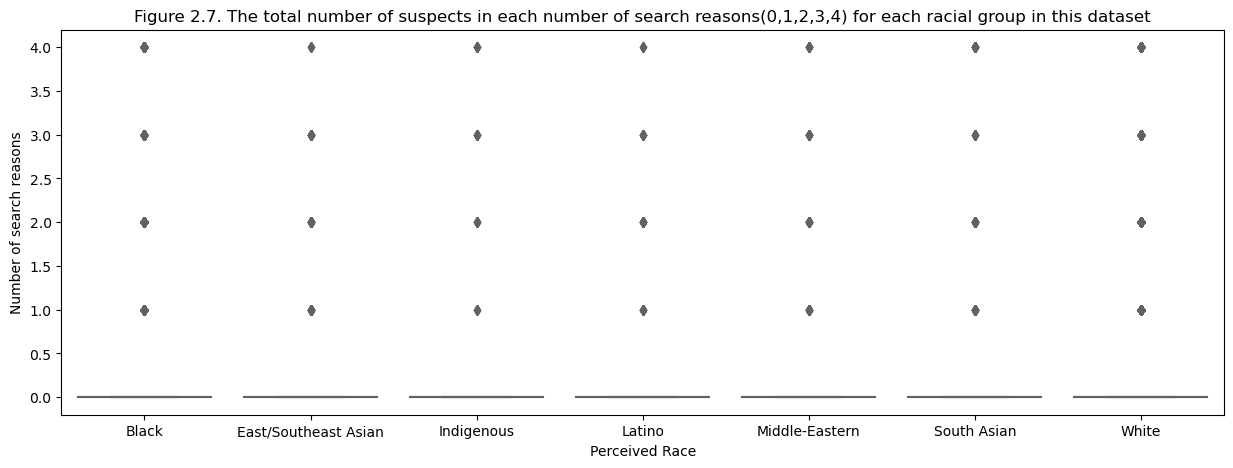

Table 2.4 The summary statistics of number of search reasons(0,1,2,3,4) for each racial group
                       count      mean       std  min  25%  50%  75%  max
Perceived_Race                                                           
Black                 6800.0  0.192206  0.718895  0.0  0.0  0.0  0.0  4.0
East/Southeast Asian  2520.0  0.061508  0.371400  0.0  0.0  0.0  0.0  4.0
Indigenous             343.0  0.177843  0.717679  0.0  0.0  0.0  0.0  4.0
Latino                 853.0  0.079719  0.442171  0.0  0.0  0.0  0.0  4.0
Middle-Eastern        1598.0  0.074468  0.443515  0.0  0.0  0.0  0.0  4.0
South Asian           1964.0  0.081976  0.474410  0.0  0.0  0.0  0.0  4.0
White                 9944.0  0.134352  0.603595  0.0  0.0  0.0  0.0  4.0


In [21]:
plt.figure(figsize=(15,5))
ax= sns.boxplot(x="Perceived_Race", y="Number_search_reason", data=data, palette="Set3") 
plt.title("Figure 2.7. The total number of suspects in each number of search reasons(0,1,2,3,4) for each racial group in this dataset")
plt.xlabel('Perceived Race')
plt.ylabel('Number of search reasons')
plt.show()
print('Table 2.4 The summary statistics of number of search reasons(0,1,2,3,4) for each racial group')
print(data.groupby("Perceived_Race")['Number_search_reason'].describe())


# T-test 3 [ search reason ~ race]


 t-results for East/Southeast Asian and black group



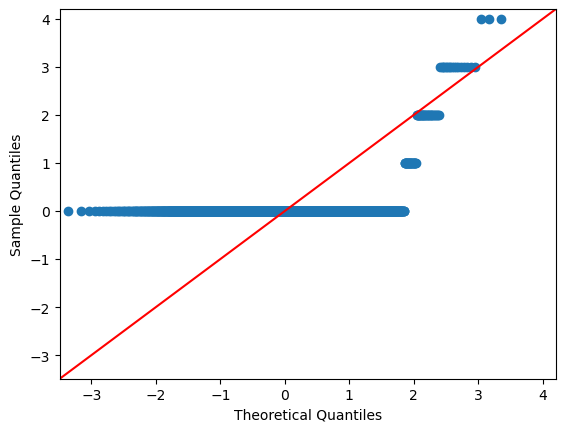

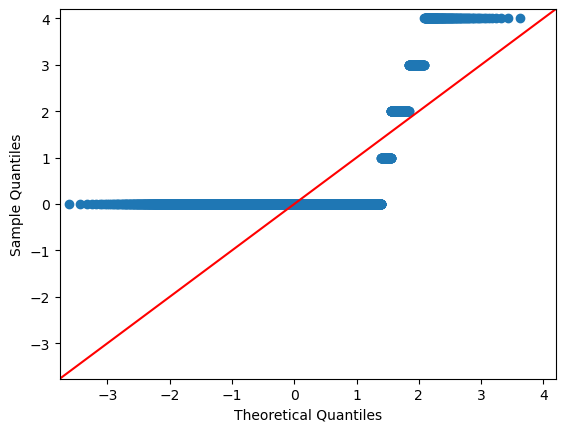

Table 2.8. The result of t-test for the mean of number of search reason between East/Southeast Asian and Black groups
                           Satterthwaite t-test    results
0  Difference (East/Southeast Asian - Black) =     -0.1307
1                         Degrees of freedom =   8382.8458
2                                          t =    -11.4305
3                      Two side test p value =      0.0000
4                     Difference < 0 p value =      0.0000
5                     Difference > 0 p value =      1.0000
6                                  Cohen's d =     -0.2030
7                                  Hedge's g =     -0.2030
8                             Glass's delta1 =     -0.3519
9                           Point-Biserial r =     -0.1239


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,East/Southeast Asian,2520.0,0.061508,0.371400,0.007398,0.047000,0.076016
1,Black,6800.0,0.192206,0.718895,0.008718,0.175116,0.209296
2,combined,9320.0,0.156867,0.646307,0.006695,0.143744,0.169990


In [22]:
print('\n t-results for East/Southeast Asian and black group\n')

summary, results = rp.ttest(group1= data['Number_search_reason'][data['Perceived_Race'] == 'East/Southeast Asian'], group1_name= "East/Southeast Asian",
         group2= data['Number_search_reason'][data['Perceived_Race'] == 'Black'], group2_name= "Black",
                           equal_variances = False, paired = False)
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data['Number_search_reason'][data['Perceived_Race'] == 'East/Southeast Asian'], line='45')
plt.show()
fig = sm.qqplot(data['Number_search_reason'][data['Perceived_Race'] == 'Black'], line='45')
plt.show()

print('Table 2.8. The result of t-test for the mean of number of search reason between East/Southeast Asian and Black groups')
print(results)
summary

## number of search reason ~ gender

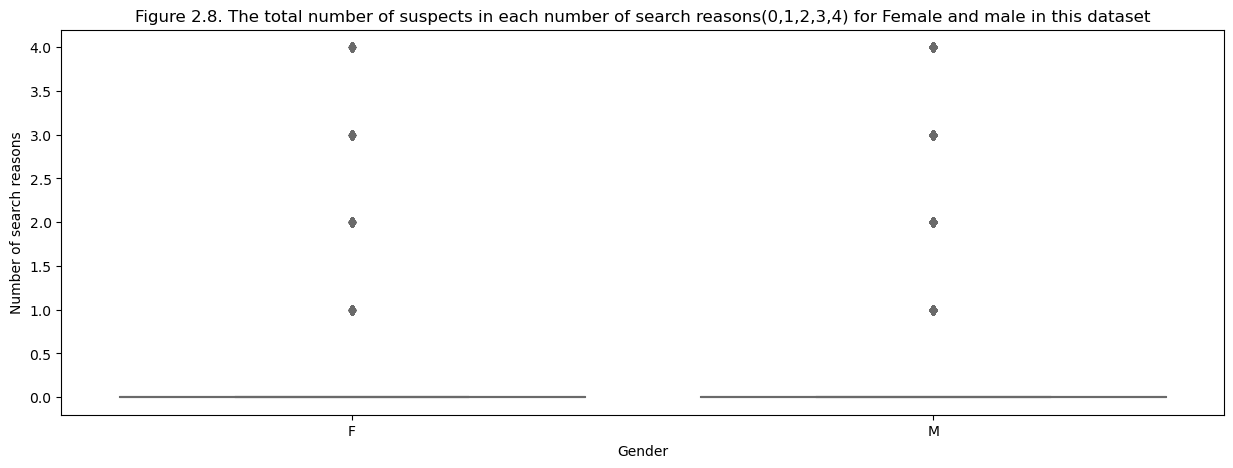

Table 2.5 The summary statistics of number of search reasons(0,1,2,3,4) for female and male
       count      mean       std  min  25%  50%  75%  max
Sex                                                      
F     5289.0  0.104746  0.524724  0.0  0.0  0.0  0.0  4.0
M    18733.0  0.141622  0.618737  0.0  0.0  0.0  0.0  4.0


In [23]:

plt.figure(figsize=(15,5))
ax= sns.boxplot(x="Sex", y="Number_search_reason", data=data, palette="Set3")
plt.title("Figure 2.8. The total number of suspects in each number of search reasons(0,1,2,3,4) for Female and male in this dataset")
plt.xlabel('Gender')
plt.ylabel('Number of search reasons')
plt.show()

print('Table 2.5 The summary statistics of number of search reasons(0,1,2,3,4) for female and male')
print(data.groupby("Sex")['Number_search_reason'].describe())


# t-test 4 [number of search reason ~ gender]


 t-results for number of search between male and female



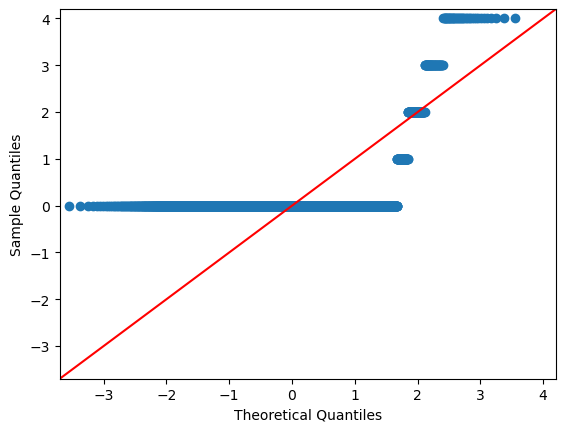

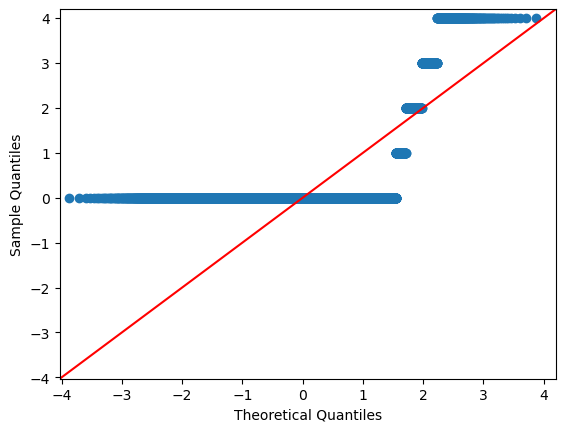

Table 2.9. The result of t-test for the mean of number search reason between female and male groups
        Satterthwaite t-test    results
0      Difference (F - M) =     -0.0369
1      Degrees of freedom =   9827.2275
2                       t =     -4.3310
3   Two side test p value =      0.0000
4  Difference < 0 p value =      0.0000
5  Difference > 0 p value =      1.0000
6               Cohen's d =     -0.0615
7               Hedge's g =     -0.0615
8          Glass's delta1 =     -0.0703
9        Point-Biserial r =     -0.0436


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,F,5289.0,0.104746,0.524724,0.007215,0.090601,0.118890
1,M,18733.0,0.141622,0.618737,0.004521,0.132761,0.150483
2,combined,24022.0,0.133503,0.599490,0.003868,0.125921,0.141084


In [24]:

print('\n t-results for number of search between male and female\n')

summary, results = rp.ttest(group1= data['Number_search_reason'][data['Sex'] == 'F'], group1_name= "F",
         group2= data['Number_search_reason'][data['Sex'] == 'M'], group2_name= "M",
                           equal_variances = False, paired = False)
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data['Number_search_reason'][data['Sex'] == 'F'], line='45')
plt.show()
fig = sm.qqplot(data['Number_search_reason'][data['Sex'] == 'M'], line='45')
plt.show()
print('Table 2.9. The result of t-test for the mean of number search reason between female and male groups')
print(results)
summary

# Part  4 Method [2 one-way anovas + 2 two-way anovas ]

##  one-way anova  [ action ~race]

1.1 one-way anova for the mean of  number of actions at rest for different racial gorups
Null hypothesis: each racial Group means about number of actions at rest is equal (no variation in means of groups)
H0: μ1=μ2=…=μp


Alternative hypothesis: At least, one group mean is different from other groups
H1: All μ are not equal

In [25]:
# Ordinary Least Squares (OLS) model
model = ols('Number_actions_at_arrest ~ C(Perceived_Race)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print('Table 4.1. The result for one-way anova for the mean of number of actions at arrest among different racial groups')
anova_table

Table 4.1. The result for one-way anova for the mean of number of actions at arrest among different racial groups


,sum_sq,df,F,PR(>F)
C(Perceived_Race),41.821172,6.0,15.966735,2.055941e-18
Residual,10483.624003,24015.0,NaN,NaN


###   Tukey’s honestly significantly differenced (HSD) 
From ANOVA analysis, we know that treatment differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.


Note: When the ANOVA is significant, post hoc tests are used to see differences between specific groups. post hoc tests control the family-wise error rate (inflated type I error rate) due to multiple comparisons. post hoc tests adjust the p values (Bonferroni correction) or critical value (Tukey’s HSD test).

In [26]:
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=data, res_var='Number_actions_at_arrest', xfac_var='Perceived_Race', anova_model='Number_actions_at_arrest ~ C(Perceived_Race)')
res.tukey_summary

res.tukey_summary[res.tukey_summary['p-value'] <= 0.05]

print('\n')
print('Table 4.2. The statistically significant tukey tests results for \n the mean of number of actions at arrest among all different racial groups'' paisrs')
print('\n')
res.tukey_summary[res.tukey_summary['p-value'] <= 0.05]




Table 4.2. The statistically significant tukey tests results for 
 the mean of number of actions at arrest among all different racial groups paisrs




,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Indigenous,Black,0.154257,0.046446,0.262067,5.966304,0.001000
1,Indigenous,White,0.167804,0.060816,0.274793,6.540143,0.001000
2,Indigenous,South Asian,0.196680,0.082674,0.310686,7.193747,0.001000
3,Indigenous,Middle-Eastern,0.206660,0.090729,0.322590,7.433250,0.001000
4,Indigenous,East/Southeast Asian,0.259257,0.147136,0.371377,9.641997,0.001000
5,Indigenous,Latino,0.271947,0.147391,0.396503,9.104182,0.001000
9,Black,East/Southeast Asian,0.105000,0.059567,0.150433,9.636884,0.001000
10,Black,Latino,0.117691,0.046927,0.188454,6.935138,0.001000
13,White,East/Southeast Asian,0.091452,0.048004,0.134900,8.777008,0.001000
14,White,Latino,0.104143,0.034637,0.173648,6.247880,0.001000


### Test ANOVA assumption

Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)


homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s, Bartlett’s, or Brown-Forsythe test)

Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response

The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).


Figurexxx. Normality check for one-way ANOVA


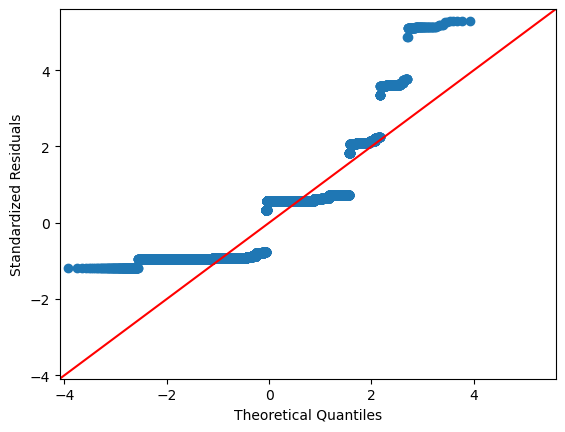

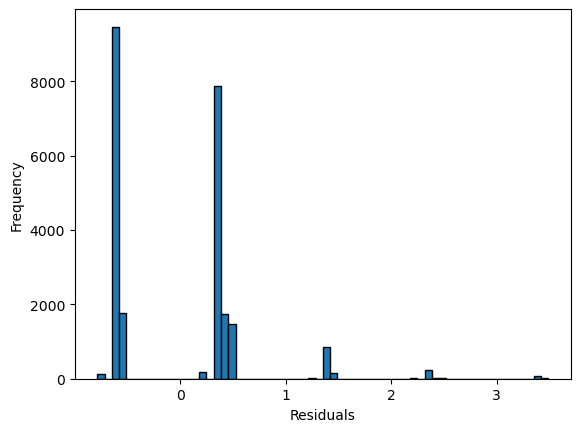

In [27]:
##### Normality 

print('Figurexxx. Normality check for one-way ANOVA')  

# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
fig.set_size_inches(18.5, 10.5)
sm.qqplot(res.anova_std_residuals, line='45')

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()


In [28]:

print('Table 10. Variance check for one-way ANOVA')  

#### Variance 
# Homogeneity of variances. Null hypothesis: samples from populations have equal variances.
res = stat()
res.levene(df=data, res_var='Number_actions_at_arrest', xfac_var='Perceived_Race')
res.levene_summary
# output
# As the p value (0.0000) is significant, 
# we reject null hypothesis and conclude that treatments does not have equal variances.

Table 10. Variance check for one-way ANOVA


,Parameter,Value
0,Test statistics (W),3.5885
1,Degrees of freedom (Df),6.0000
2,p value,0.0015


# One-way anova [ action ~ age]

In [29]:
# one-way anova
model = ols('Number_actions_at_arrest ~ C(Age_group__at_arrest_)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('Table 4.3. The result for one-way anova for the mean of number of actions at arrest among different age groups')
anova_table

Table 4.3. The result for one-way anova for the mean of number of actions at arrest among different age groups


,sum_sq,df,F,PR(>F)
C(Age_group__at_arrest_),17.523117,6.0,6.674609,4.518947e-07
Residual,10507.922058,24015.0,NaN,NaN


## Tukey t-test

In [30]:
#!pip install bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=data, res_var='Number_actions_at_arrest', xfac_var='Age_group__at_arrest_', anova_model='Number_actions_at_arrest ~ C(Age_group__at_arrest_)')
res.tukey_summary
print('Table 4.4. The statistically significant tukey tests results for \n the mean of number of actions at arrest among all different age groups'' paisrs')

res.tukey_summary[res.tukey_summary['p-value'] <= 0.05]

Table 4.4. The statistically significant tukey tests results for 
 the mean of number of actions at arrest among all different age groups paisrs


,group1,group2,Diff,Lower,Upper,q-value,p-value
3,Aged 45 to 54 years,Aged 18 to 24 years,0.059035,0.014072,0.103998,5.474951,0.002091
6,Aged 25 to 34 years,Aged 35 to 44 years,0.037628,0.001740,0.073517,4.371986,0.032733
9,Aged 25 to 34 years,Aged 65 years and older,0.078168,0.006060,0.150276,4.520315,0.023566
10,Aged 25 to 34 years,Aged 17 years and younger,0.060049,0.002741,0.117358,4.369264,0.032927
12,Aged 35 to 44 years,Aged 18 to 24 years,0.058390,0.017905,0.098876,6.013952,0.001000
18,Aged 18 to 24 years,Aged 65 years and older,0.098930,0.024428,0.173433,5.537061,0.001753
19,Aged 18 to 24 years,Aged 17 years and younger,0.080812,0.020517,0.141106,5.588798,0.001512


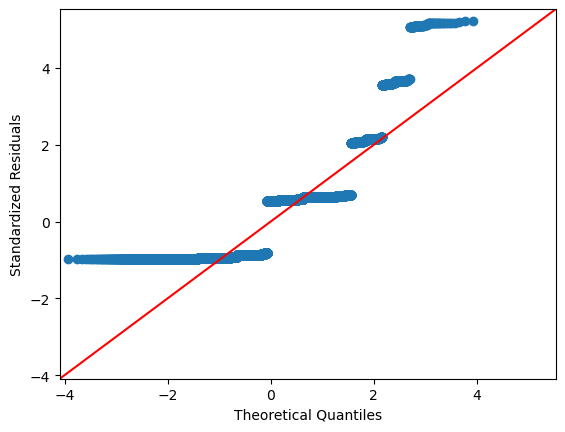

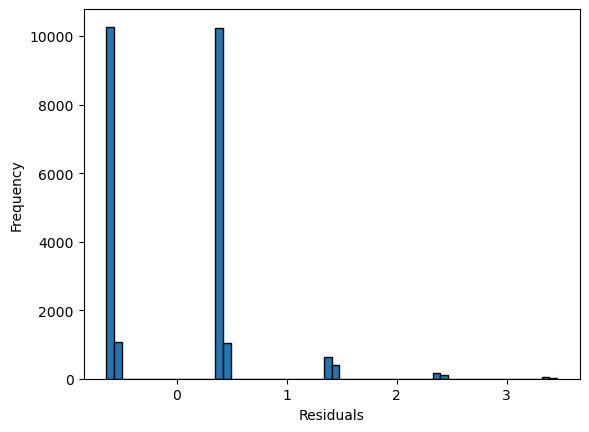

In [31]:
##### Normality 
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()


In [32]:
#### Variance 
# Homogeneity of variances. Null hypothesis: samples from populations have equal variances.

res = stat()
res.levene(df=data, res_var='Number_actions_at_arrest', xfac_var='Perceived_Race')
res.levene_summary
# output
# As the p value (0.0000) is significant, 
# we reject null hypothesis and conclude that treatments does not have equal variances.

,Parameter,Value
0,Test statistics (W),3.5885
1,Degrees of freedom (Df),6.0000
2,p value,0.0015


#  Research Question 1: Number of action ~ Age group & Race

In [33]:
(data.groupby(["Age_group__at_arrest_","Perceived_Race"])['Number_actions_at_arrest'].describe())

count      mean       std  \
Age_group__at_arrest_     Perceived_Race                                     
Aged 17 years and younger Black                  510.0  0.607843  0.577183   
                          East/Southeast Asian   107.0  0.560748  0.632121   
                          Indigenous              13.0  0.615385  0.506370   
                          Latino                  33.0  0.454545  0.564076   
                          Middle-Eastern          98.0  0.551020  0.576560   
                          South Asian             71.0  0.450704  0.627665   
                          White                  553.0  0.538879  0.598025   
Aged 18 to 24 years       Black                 1589.0  0.665198  0.711495   
                          East/Southeast Asian   510.0  0.539216  0.575730   
                          Indigenous              52.0  0.788462  0.723188   
                          Latino                 153.0  0.503268  0.708261   
                          Middle-Eastern         356.0  0.685393  0.647344   
                          South Asian            390.0  0.625641  0.563097   
                          White                 1230.0  0.657724  0.689867   
Aged 25 to 34 years       Black                 2260.0  0.649115  0.704990   
                          East/Southeast Asian   687.0  0.553130  0.608265   
                          Indigenous             113.0  0.796460  0.656823   
                          Latino                 307.0  0.530945  0.724131   
                          Middle-Eastern         463.0  0.548596  0.547834   
                          South Asian            614.0  0.623779  0.631026   
                          White                 2631.0  0.629799  0.700739   
Aged 35 to 44 years       Black                 1339.0  0.590739  0.653681   
                          East/Southeast Asian   522.0  0.488506  0.568581   
                          Indigenous              76.0  0.684211  0.677457   
                          Latino                 208.0  0.500000  0.621670   
                          Middle-Eastern         325.0  0.560000  0.638478   
                          South Asian            411.0  0.532847  0.605476   
                          White                 2189.0  0.619004  0.690842   
Aged 45 to 54 years       Black                  693.0  0.582973  0.627500   
                          East/Southeast Asian   342.0  0.502924  0.576919   
                          Indigenous              62.0  0.903226  0.881684   
                          Latino                  88.0  0.488636  0.587109   
                          Middle-Eastern         213.0  0.535211  0.676373   
                          South Asian            273.0  0.593407  0.587455   
                          White                 1687.0  0.596325  0.652624   
Aged 55 to 64 years       Black                  306.0  0.604575  0.650734   
                          East/Southeast Asian   231.0  0.532468  0.609727   
                          Indigenous              21.0  0.857143  0.910259   
                          Latino                  47.0  0.574468  0.683491   
                          Middle-Eastern         107.0  0.504673  0.635043   
                          South Asian            141.0  0.567376  0.525153   
                          White                 1185.0  0.638819  0.697131   
Aged 65 years and older   Black                  103.0  0.679612  0.703125   
                          East/Southeast Asian   121.0  0.479339  0.517996   
                          Indigenous               6.0  0.666667  1.211060   
                          Latino                  17.0  0.470588  0.624264   
                          Middle-Eastern          36.0  0.583333  0.649175   
                          South Asian             64.0  0.531250  0.533594   
                          White                  469.0  0.528785  0.628493   

                                                min  25%  50%   75%  m

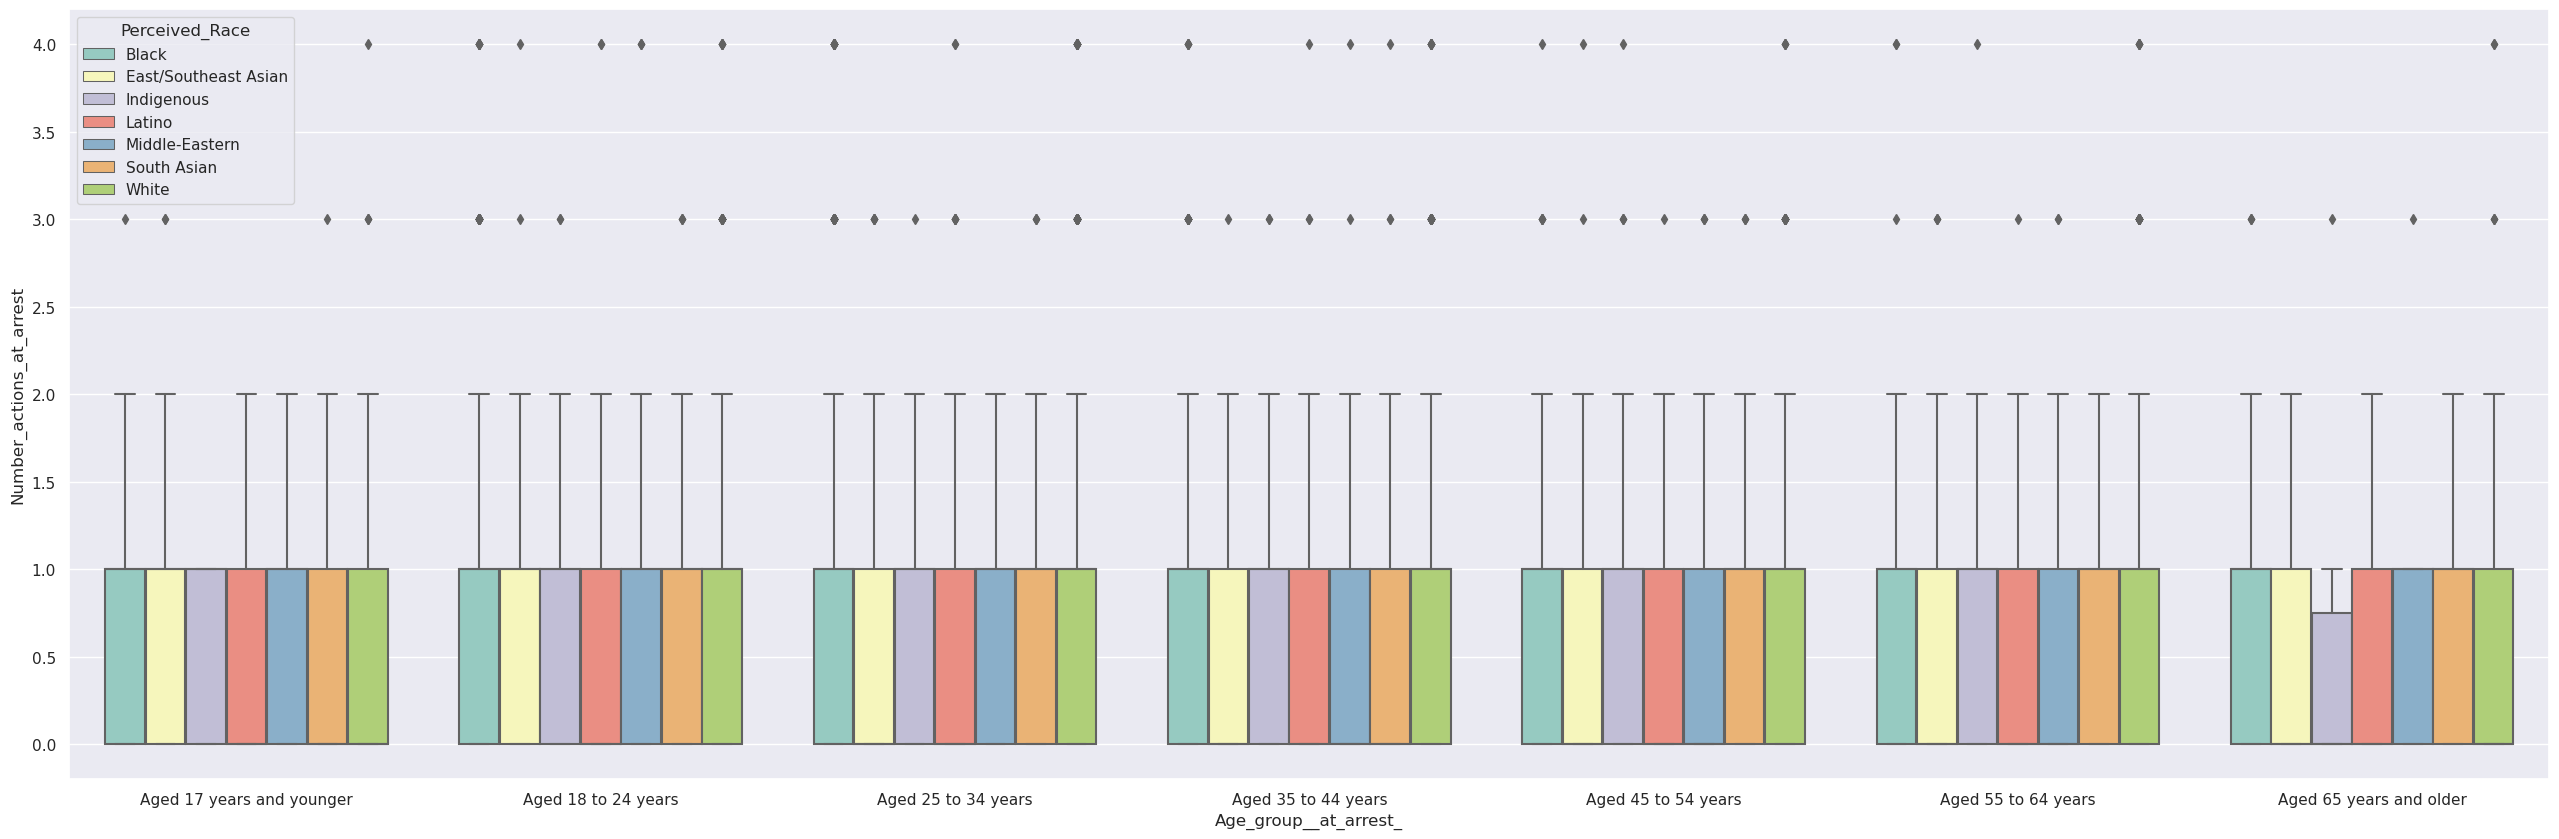

In [34]:
sns.set(rc = {'figure.figsize':(32,10)})
ax.set(title = 'Figure XXX.The action at arrest differences among age groups and racial groups')

AX = sns.boxplot(x="Age_group__at_arrest_", y="Number_actions_at_arrest", hue="Perceived_Race", data=data, palette="Set3") 
plt.show()

# 2-way Anova result 


In [42]:
res = stat()
res.anova_stat(df=data, res_var='Number_actions_at_arrest', anova_model='Number_actions_at_arrest~C(Age_group__at_arrest_)+C(Perceived_Race)+C(Perceived_Race):C(Age_group__at_arrest_)')
print('Table 4.5. The result for two-way anova for the mean of number of actions at arrest\n among different age groups and different racial groups')

plt.show()
res.anova_summary

Table 4.5. The result for two-way anova for the mean of number of actions at arrest
 among different age groups and different racial groups


,df,sum_sq,mean_sq,F,PR(>F)
C(Age_group__at_arrest_),6.0,18.381704,3.063617,7.027308,1.732971e-07
C(Perceived_Race),6.0,42.679759,7.113293,16.316432,7.544843e-19
C(Perceived_Race):C(Age_group__at_arrest_),36.0,14.000102,0.388892,0.892038,6.539827e-01
Residual,23973.0,10451.242197,0.435959,NaN,NaN


# For interaction effects 

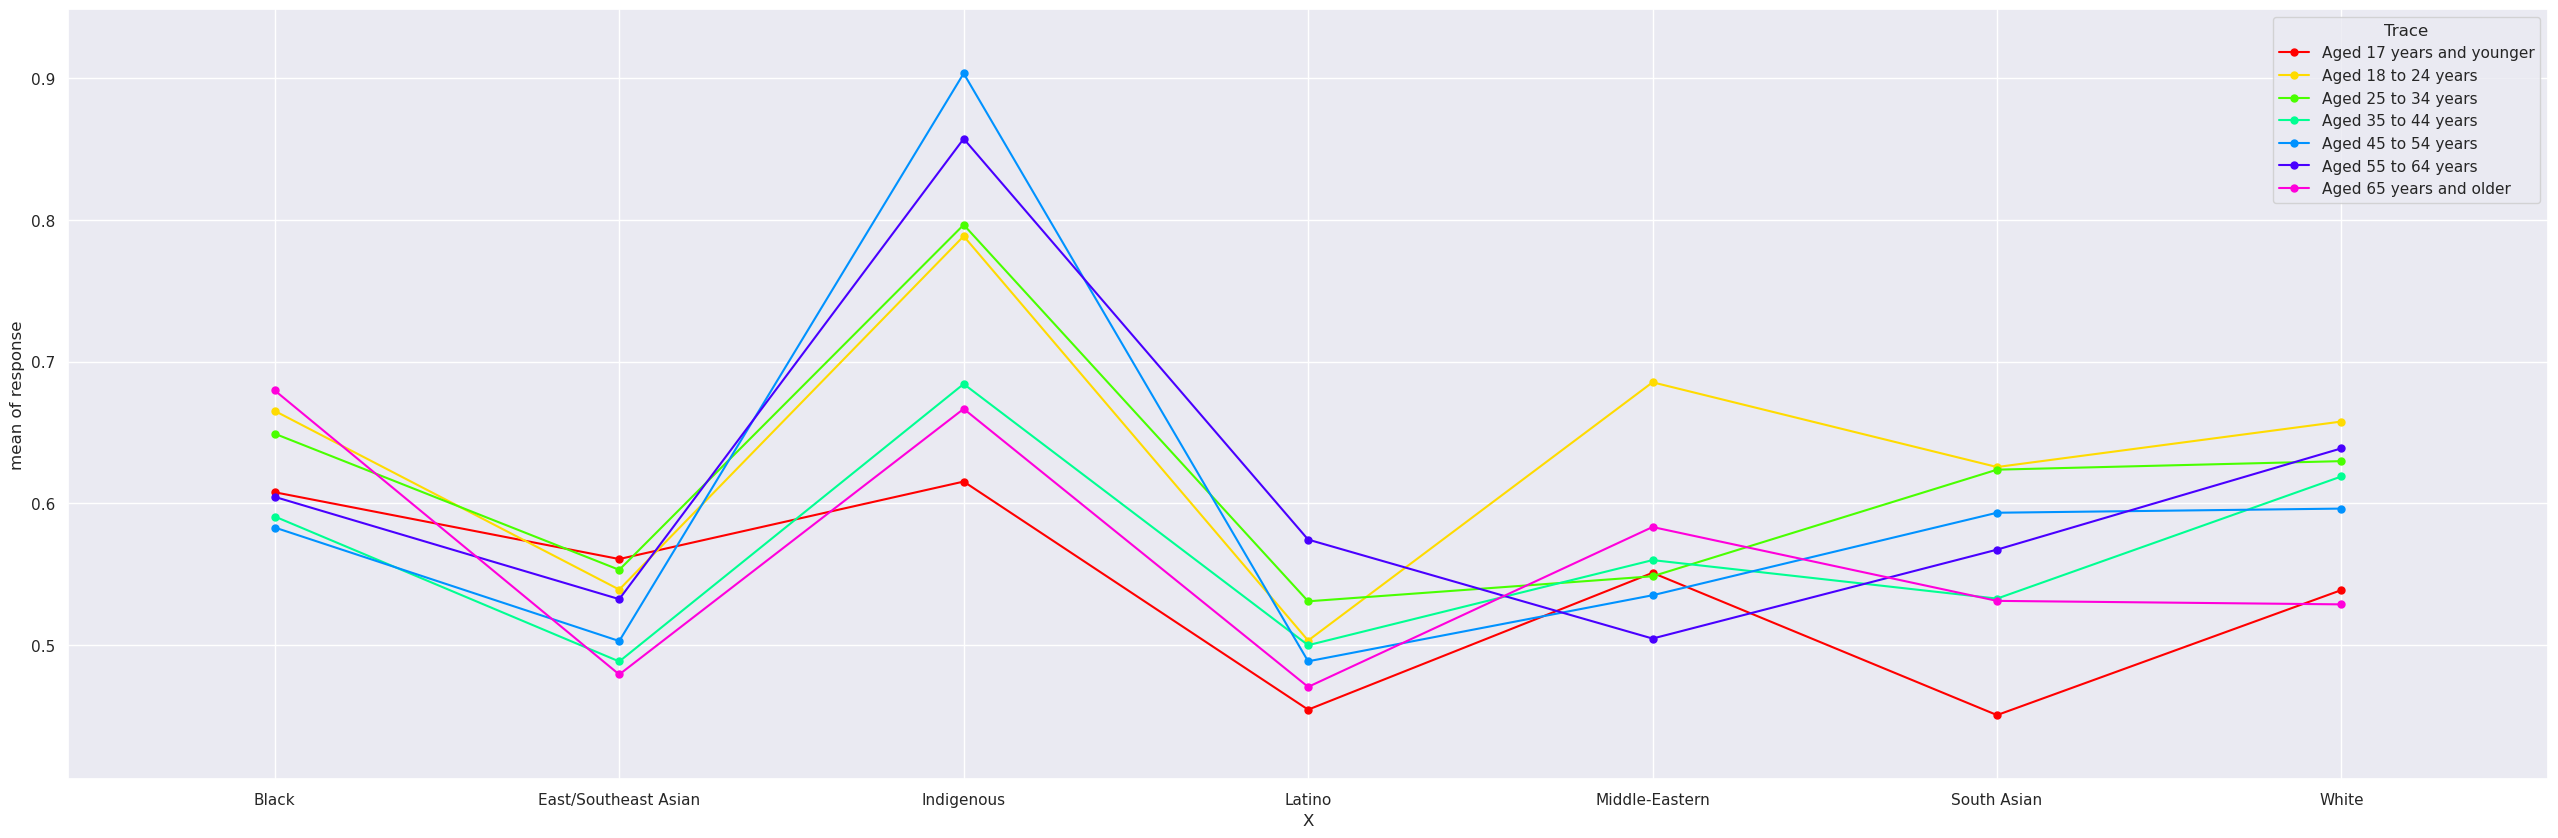

In [43]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(
    x=data['Perceived_Race'].to_numpy() ,
    trace=data['Age_group__at_arrest_'].to_numpy() ,
    response= data['Number_actions_at_arrest'].to_numpy(),
   ms=10
    
)


Text(0, 0.5, 'Number actions at arrest')

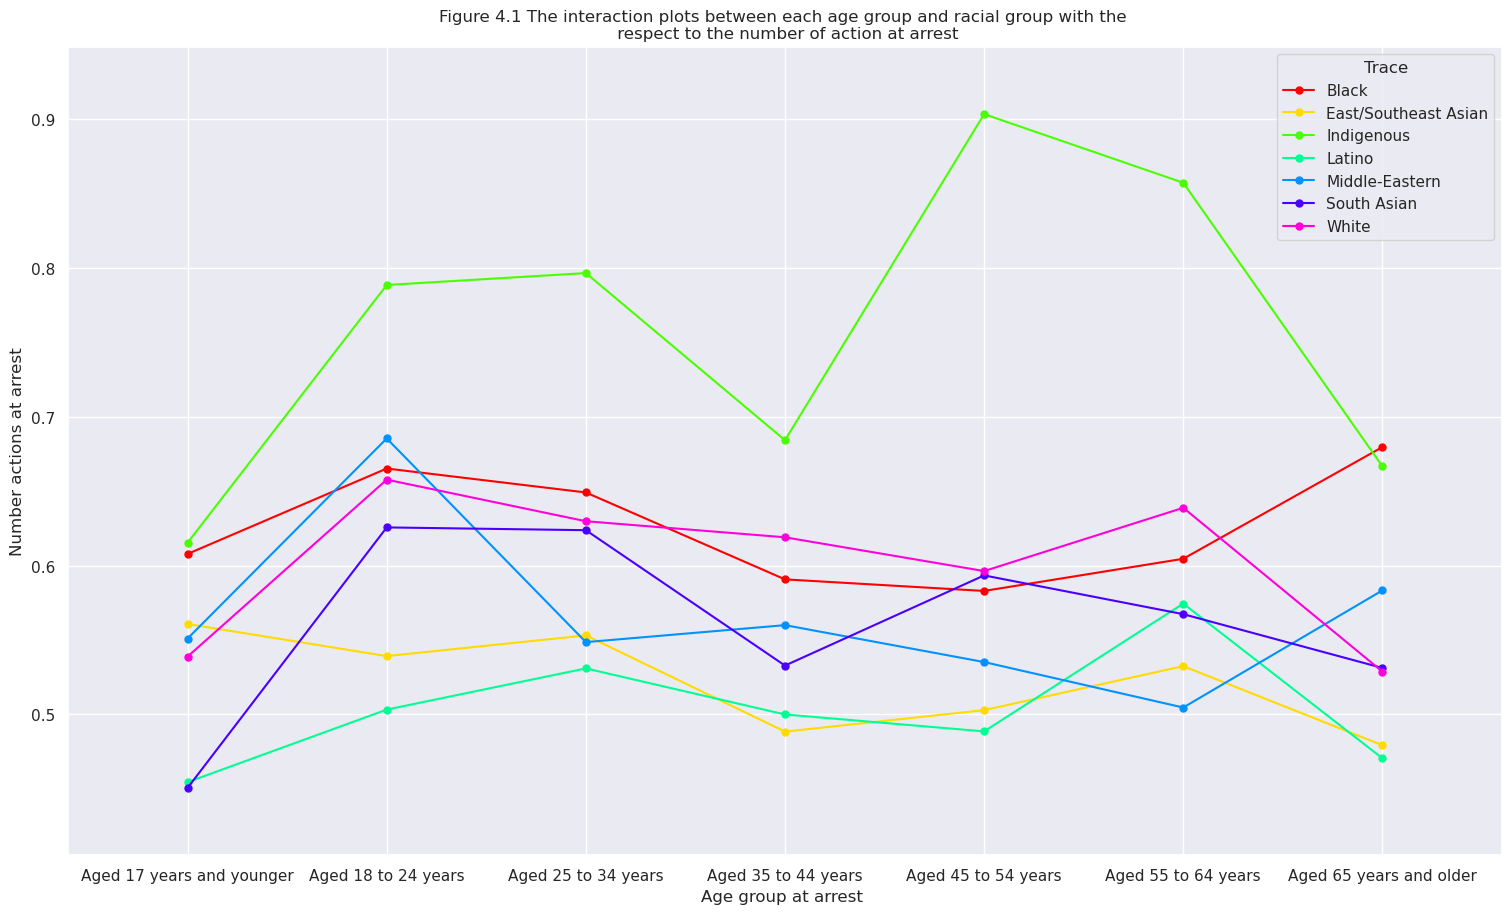

In [44]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(
    x=data['Age_group__at_arrest_'].to_numpy() ,
    trace=data['Perceived_Race'].to_numpy() ,
    response= data['Number_actions_at_arrest'].to_numpy(),
   ms=10
    
)

fig.set_size_inches(18.5, 10.5)
plt.title("Figure 4.1 The interaction plots between each age group and racial group with the \n respect to the number of action at arrest")
plt.xlabel('Age group at arrest ')
plt.ylabel('Number actions at arrest')

In [54]:
# for interaction  effect years
res.tukey_hsd(df=data, res_var='Number_actions_at_arrest', xfac_var=['Perceived_Race', 'Age_group__at_arrest_'],anova_model='Number_actions_at_arrest ~ C(Perceived_Race) + C(Age_group__at_arrest_) + C(Perceived_Race):C(Age_group__at_arrest_)')
interaction_effect_rq1 = pd.DataFrame(res.tukey_summary)
print('Table 4.6. The statistically significant tukey tests results for the mean of number of actions at arrest \n among all different age groups and racial groups'' paisrs')

interaction_effect_rq1[interaction_effect_rq1['p-value'] <= 0.05]

Table 4.6. The statistically significant tukey tests results for the mean of number of actions at arrest 
 among all different age groups and racial groups paisrs


,group1,group2,Diff,Lower,Upper,q-value,p-value
18,"(Indigenous, Aged 45 to 54 years)","(White, Aged 65 years and older)",0.374441,0.019037,0.729845,5.934865,0.022554
19,"(Indigenous, Aged 45 to 54 years)","(White, Aged 17 years and younger)",0.364347,0.012109,0.716585,5.826775,0.030310
22,"(Indigenous, Aged 45 to 54 years)","(South Asian, Aged 35 to 44 years)",0.370379,0.012059,0.728699,5.822706,0.030645
34,"(Indigenous, Aged 45 to 54 years)","(East/Southeast Asian, Aged 45 to 54 years)",0.400302,0.037275,0.763329,6.211522,0.010172
35,"(Indigenous, Aged 45 to 54 years)","(East/Southeast Asian, Aged 25 to 34 years)",0.350096,0.001339,0.698854,5.654745,0.047437
36,"(Indigenous, Aged 45 to 54 years)","(East/Southeast Asian, Aged 35 to 44 years)",0.414720,0.061429,0.768011,6.612595,0.002908
38,"(Indigenous, Aged 45 to 54 years)","(East/Southeast Asian, Aged 18 to 24 years)",0.364010,0.010278,0.717742,5.796804,0.032867
39,"(Indigenous, Aged 45 to 54 years)","(East/Southeast Asian, Aged 65 years and older)",0.423887,0.013121,0.834652,5.813066,0.031456
42,"(Indigenous, Aged 45 to 54 years)","(Latino, Aged 25 to 34 years)",0.372281,0.006092,0.738470,5.726842,0.039536
43,"(Indigenous, Aged 45 to 54 years)","(Latino, Aged 35 to 44 years)",0.403226,0.022676,0.783775,5.968788,0.020540


# Test ANOVA assumptions 
Similar to one-way ANOVA,we  use visual approaches validate the assumptions for homogeneity of variances and normal distribution of residuals.

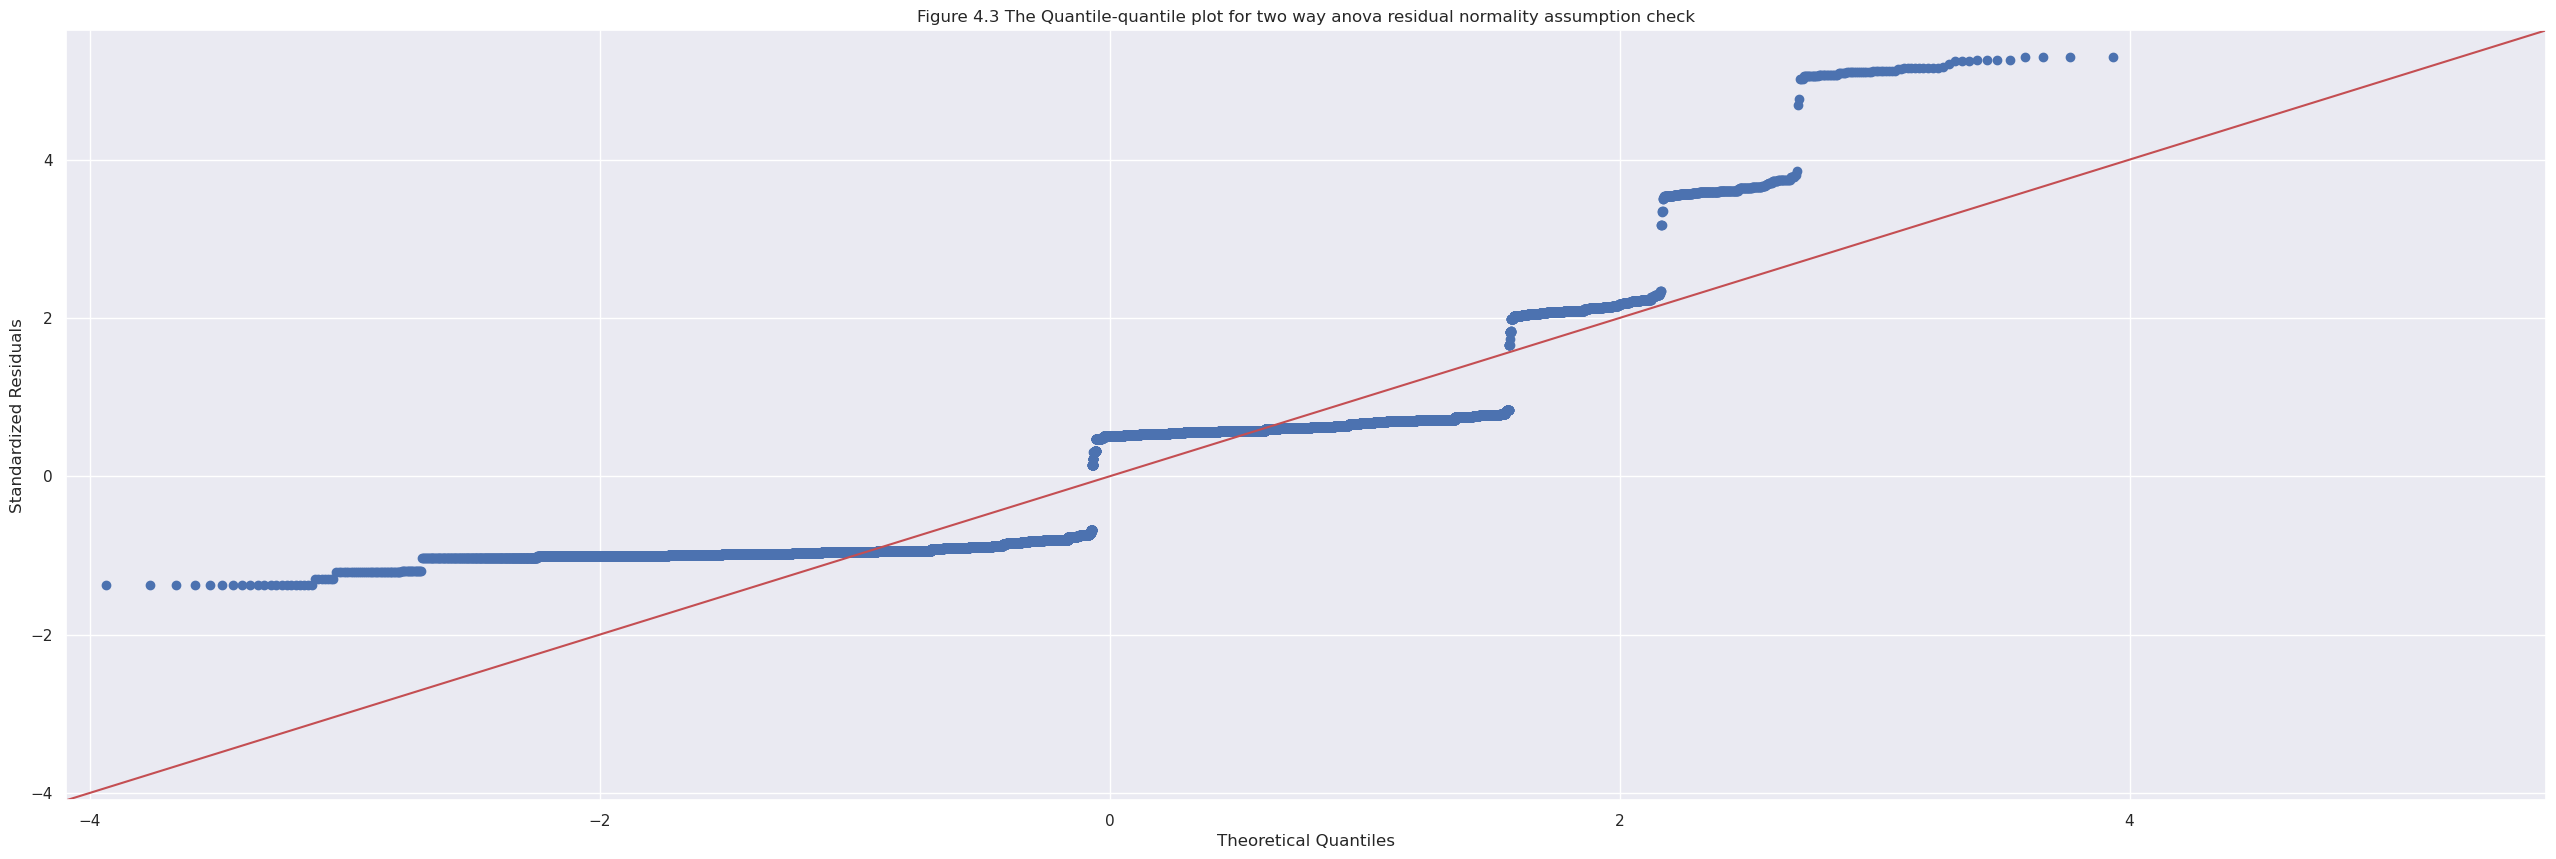

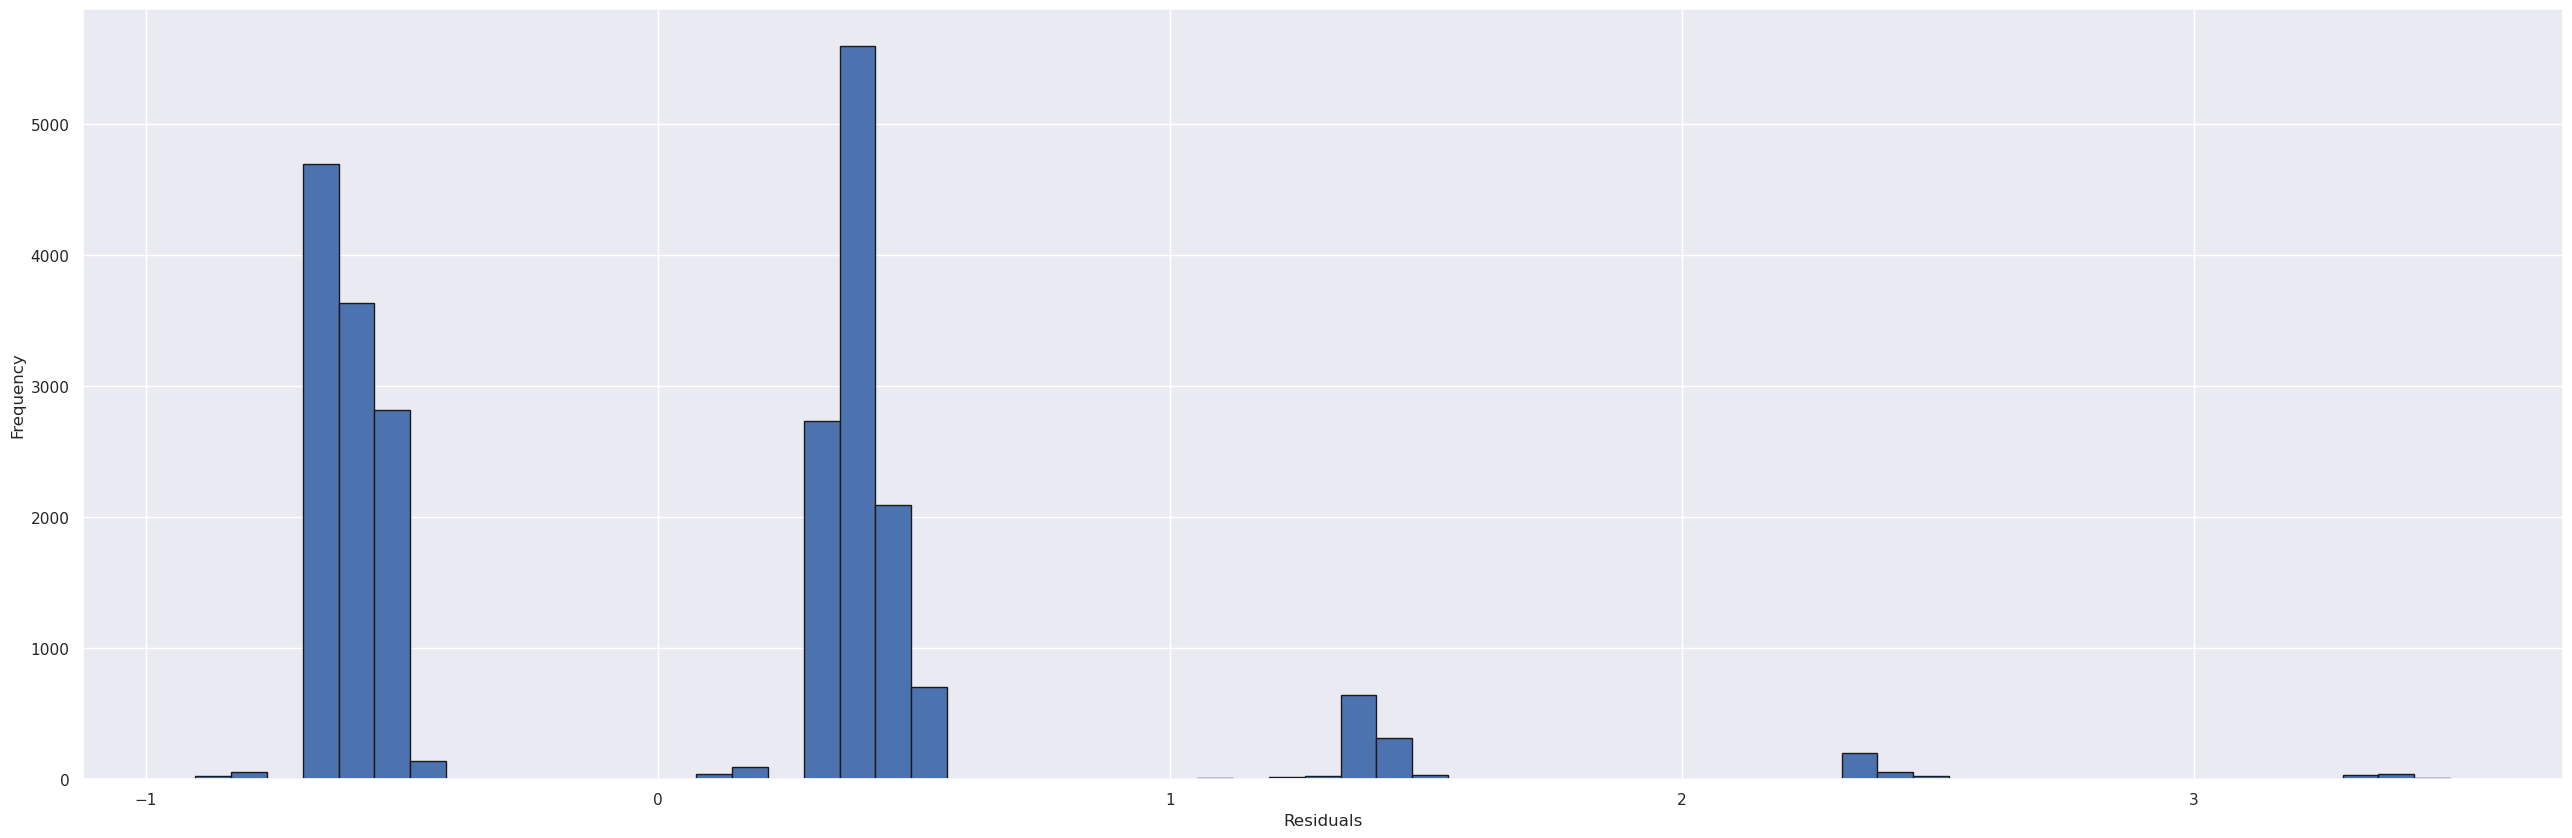

In [56]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.title("Figure 4.3 The Quantile-quantile plot for two way anova residual normality assumption check")

plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()


In [52]:
print('Table 4.10. the test result for Levene’s test to check \nthe assumption of homogeneity of variances')
res = stat()
res.levene(df=data, res_var='Number_actions_at_arrest', xfac_var=['Perceived_Race', 'Age_group__at_arrest_'])
res.levene_summary


Table 4.10. the test result for Levene’s test to check 
the assumption of homogeneity of variances


,Parameter,Value
0,Test statistics (W),1.3623
1,Degrees of freedom (Df),48.0000
2,p value,0.0483


# Q2: number of search reason ~  Sex + race 

In [ ]:
print(data.groupby(["Sex","Perceived_Race"])['Number_search_reason'].describe())


In [ ]:
sns.set(rc = {'figure.figsize':(32,10)})
ax.set(title = 'Figure XXX.The action at rest differences among age groups and racial groups')

AX = sns.boxplot(x="Perceived_Race", y="Number_search_reason", hue="Sex", data=data) 
plt.show()

In [ ]:
res = stat()
res.anova_stat(df=data, res_var='Number_search_reason', anova_model='Number_search_reason~C(Sex)+C(Perceived_Race)+C(Perceived_Race):C(Sex)')
print('Table 4.7. The result for two-way anova for the mean of number of search reasons \n among different gender groups and different racial groups')

res.anova_summary

In [ ]:
res = stat()
# for main effect SEX
res.tukey_hsd(df=data, res_var='Number_search_reason', xfac_var='Sex', anova_model='Number_search_reason~C(Perceived_Race)+C(Sex)+C(Perceived_Race):C(Sex)')
res.tukey_summary

In [ ]:
# for main effect perceived race 
res.tukey_hsd(df=data, res_var='Number_search_reason', xfac_var='Perceived_Race', anova_model='Number_search_reason~C(Perceived_Race)+C(Sex)+C(Perceived_Race):C(Sex)')
signi_df = pd.DataFrame(res.tukey_summary)
print('Table 4.8. The statistically significant tukey tests results for the mean of number of search reasons\n among all different racial groups'' paisrs')

signi_df[signi_df['p-value'] <= 0.05]

In [ ]:
# For interatcion effect
res.tukey_hsd(df=data, res_var='Number_search_reason', xfac_var=['Perceived_Race','Sex'], anova_model='Number_search_reason~C(Perceived_Race)+C(Sex)+C(Perceived_Race):C(Sex)')
interaction_effect_rq1 = pd.DataFrame(res.tukey_summary)
print('Table 4.9. The statistically significant tukey tests results for the mean of number of search reasons\n among all different racial groups and different gender'' paisrs')

interaction_effect_rq1[interaction_effect_rq1['p-value'] <= 0.05]

In [ ]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(
    x=data['Perceived_Race'].to_numpy() ,
    trace=data['Sex'].to_numpy() ,
    response= data['Number_search_reason'].to_numpy(),
   colors=['red','blue'], markers=['D','^'], ms=10
    
)

In [ ]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.factorplots import interaction_plot

fig = interaction_plot(
    x=data['Sex'].to_numpy() ,
    trace=data['Perceived_Race'].to_numpy() ,
    response= data['Number_search_reason'].to_numpy(),
   ms=10
    
)
fig.set_size_inches(18.5, 10.5)
plt.title("Figure 4.2 The interaction plots between each gender group and racial group with the \n respect to the number of search reasons")
plt.xlabel('Gender')
plt.ylabel('Number search at arrest')

# Test Anova Assumption

In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [ ]:
# We will use Levene’s test to check the assumption of homogeneity of variances,
res = stat()
res.levene(df=data, res_var='Number_search_reason', xfac_var=['Perceived_Race', 'Sex'])
res.levene_summary